# Image Classification

**Name:** Aman Chopra  
**Purdue Email:** chopra21@purdue.edu  
**[Github Repo](https://github.com/amanichopra/ANN-Image-Classification)**

## Resources Used:
- https://www.sebastian-mantey.com/theory-blog/basics-of-deep-learning-p1-introduction
- https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab#:~:text=Dropout%20is%20a%20technique%20used,update%20of%20the%20training%20phase.
- https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/

## Features

- Designed ANN with numpy with customizations for $l$ layers, $n$ neurons/layer, mini-batch gradient descent, and multiple activation functions (sigmoid and relu). Achieved 94% accuracy on MNIST dataset.
- Implemented tensorflow CNN with dropout. Achieved 99% accuracy on MNIST dataset.
- Incorporated support for iris dataset classification.

## Methodology

**1) Custom ANN**

The most difficult part of designing the ANN was implementing backpropogation. I began by understanding the forward-feed and backpropogation logic with one training example. The MNIST dataset, however, was much larger with 10,000 training examples; This required using numpy matrix operations for better efficiency and speed. After implementing the ANN, I constructed ~1,000 models with different combinations of hyperparameters, as shown below:

```python
mods = []
for epoch in [5, 10, 15, 50]:
    for lr in [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 5]:
        for neurons in [50, 100, 256, 500, 800]:
            for mbs in 10, 50, 100:
                for iter in range(3):
                    mod = trainModel(data[0], epochs=epoch, learningRate=lr, layers=2*[neurons], mbs=mbs)
                    mods.append(mod.getParams(data[1]))
pd.DataFrame(mods).to_csv('hyperparams.csv')
```

In [1]:
import pandas as pd

hyperparams = pd.read_csv('hyperparams.csv').iloc[:,1:]
hyperparams.head()

,initial_weights,num_layers,neurons_per_layer,lr,epochs,mbs,train_errors,train_acc,test_error,test_acc
0,"[array([[ 0.57481309, -0.11744472, -1.41838906...",2,50,0.1,5,100,[0.04631793 0.04404829 0.04222067 0.04032029 0...,[0.21618333 0.26455 0.31225 0.35235 0...,0.038214,0.3939
1,"[array([[-0.18096227, 1.76147673, 1.36014295...",2,50,0.1,5,100,[0.04870818 0.04722124 0.04624309 0.04533751 0...,[0.15718333 0.18763333 0.21458333 0.2409 0...,0.043958,0.2748
2,"[array([[-1.20106442, 1.01857961, 0.12858669...",2,50,0.1,5,100,[0.04659961 0.04359495 0.04130373 0.03913332 0...,[0.23453333 0.28681667 0.33408333 0.3789 0...,0.036758,0.4213
3,"[array([[ 0.53846579, 0.6927261 , -1.71915717...",2,50,0.1,5,100,[0.04876482 0.04684297 0.04443036 0.0418997 0...,[0.16771667 0.21663333 0.27203333 0.31818333 0...,0.039113,0.3695
4,"[array([[ 0.59044398, 0.36097849, 1.50415754...",2,50,0.1,5,100,[0.04804047 0.04578427 0.04396335 0.04229624 0...,[0.17746667 0.22646667 0.2639 0.29743333 0...,0.040709,0.3249


Text(0.5, 1.0, 'Correlation Matrix Between Hyperparameters')

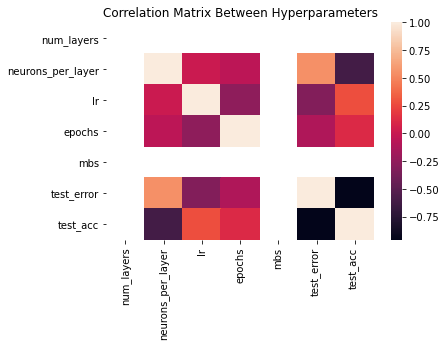

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(hyperparams.corr())
plt.title('Correlation Matrix Between Hyperparameters')

In [3]:
aggs = hyperparams.groupby(['neurons_per_layer', 'lr', 'epochs', 'mbs']).mean().reset_index().sort_values('test_acc', ascending=False).head(50).reset_index(drop=True)
aggs.head()

,neurons_per_layer,lr,epochs,mbs,num_layers,test_error,test_acc
0,50,5.0,15,100,2,0.006587,0.909222
1,50,1.5,15,100,2,0.008422,0.889233
2,50,5.0,5,100,2,0.008598,0.882744
3,50,2.5,10,100,2,0.008772,0.879822
4,50,2.0,15,100,2,0.009177,0.866544


In [4]:
hyperparams['final_train_acc'] = hyperparams['train_acc'].map(lambda x: x[1:-1].split()[-1])
melted_hyperparams = pd.melt(hyperparams, id_vars=['num_layers', 'neurons_per_layer', 'lr', 'epochs', 'mbs'], value_vars=['final_train_acc', 'test_acc'], var_name='Type', value_name='Accuracy')
melted_hyperparams['Type'] = melted_hyperparams['Type'].map(lambda x: 'Training Accuracy' if x == 'final_train_acc' else 'Testing Accuracy')
melted_hyperparams['Accuracy'] = melted_hyperparams['Accuracy'].astype(float)
melted_hyperparams.head()

,num_layers,neurons_per_layer,lr,epochs,mbs,Type,Accuracy
0,2,50,0.1,5,100,Training Accuracy,0.388517
1,2,50,0.1,5,100,Training Accuracy,0.268700
2,2,50,0.1,5,100,Training Accuracy,0.421200
3,2,50,0.1,5,100,Training Accuracy,0.355083
4,2,50,0.1,5,100,Training Accuracy,0.331033


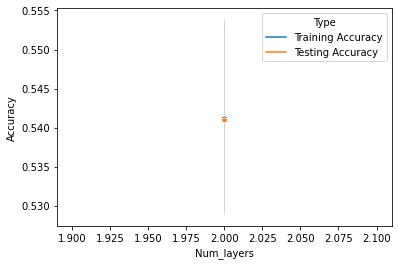

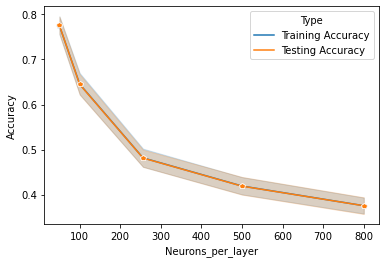

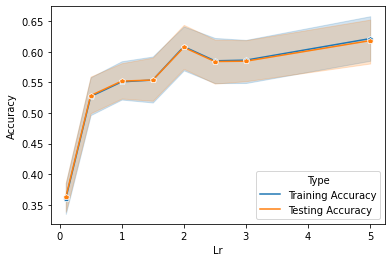

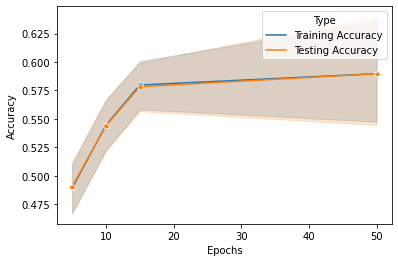

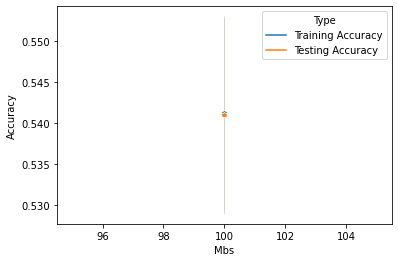

In [5]:
for param in melted_hyperparams.columns[:-2]:
    plt.figure()
    sns.lineplot(x=param, y='Accuracy', hue='Type', data=melted_hyperparams, marker='p')
    plt.xlabel(param.capitalize())

Based on the heatmap and above plots, it seems that choosing a low number of neurons per layer leads to higher training and testing accuracy. Additionally, a higher learning rate seems to be the most optimal. Let's test our findings and use 15 epochs, 1 hidden layer with 50 neurons, and mini-batch size of 100, and a learning rate of 5.

In [1]:
from ANN import load_iris, getRawData, preprocessData, trainModel, runModel, evalResults

In [7]:
raw = getRawData()
data = preprocessData(raw, 'custom_net')
model = trainModel(data[0], epochs=15, learningRate=5, layers=[50], mbs=100, ALGORITHM='custom_net')

Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 784).
New shape of xTest dataset: (10000, 784).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training Custom_NN.
Model built.


Testing Custom_NN.
Classifier algorithm: custom_net
Classifier accuracy: 94.130000%
Classifier MSE: 0.005034



(0.9413, 0.0050339925824019775)

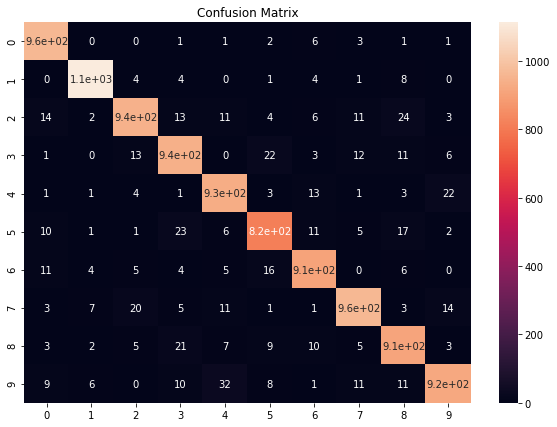

In [10]:
preds = runModel(data[1][0], model)
evalResults(data[1], preds, plot=True)

As expected, we achieve a high accuracy of ~94%!

**2) Tensorflow ANN**

Implementing an ANN with tensorflow and keras was quite simple, and even without much hyperparameter tuning, an accuracy of ~97% was acheieved on the MNIST test set. To reach above a 99% accuracy, I added a three 2D convolutional layers with respective filter sizes of 32, 64, and 128, followed by a dropout layer with a dropout rate of 20%, and finally a dense layer with 256 neurons. The architecture is described below.

In [13]:
raw = getRawData()
data = preprocessData(raw, 'tf_net')
model = trainModel(data[0], epochs=20, learningRate=5, layers=[256], mbs=100, ALGORITHM='tf_net', activation='relu')

Shape of xTrain dataset: (60000, 28, 28).
Shape of yTrain dataset: (60000,).
Shape of xTest dataset: (10000, 28, 28).
Shape of yTest dataset: (10000,).
New shape of xTrain dataset: (60000, 28, 28, 1).
New shape of xTest dataset: (10000, 28, 28, 1).
New shape of yTrain dataset: (60000, 10).
New shape of yTest dataset: (10000, 10).
Building and training TF_NN.
Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5558 - accuracy: 0.8153
Epoch 2/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1095 - accuracy: 0.9666
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0814 - accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0724 - accuracy: 0.9775
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 7/20
1875

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

Testing TF_NN.
Classifier algorithm: tf_net
Classifier accuracy: 99.030000%
Classifier MSE: 0.000759



(0.9903, 0.0007585862731933593)

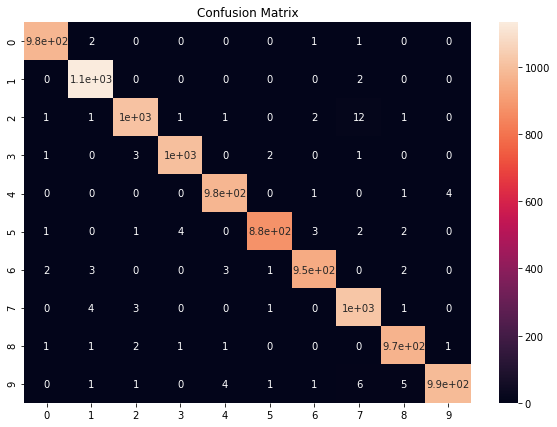

In [15]:
preds = runModel(data[1][0], model, ALGORITHM='tf_net')
evalResults(data[1], preds, plot=True, ALGORITHM='tf_net')

Despite training taking a while, 99% accuracy is acheieved!

## Applying to Iris Dataset

We can even use this custom ANN on the Iris dataset, as shown.

In [10]:
data = load_iris()
model = trainModel(data[0], epochs=20, learningRate=5, layers=[10], mbs=100, inp_size=4, out_size=3)

Building and training Custom_NN.
Model built.


Testing Custom_NN.
Classifier algorithm: custom_net
Classifier accuracy: 94.736842%
Classifier MSE: 0.099561



(0.9473684210526315, 0.0995611355581976)

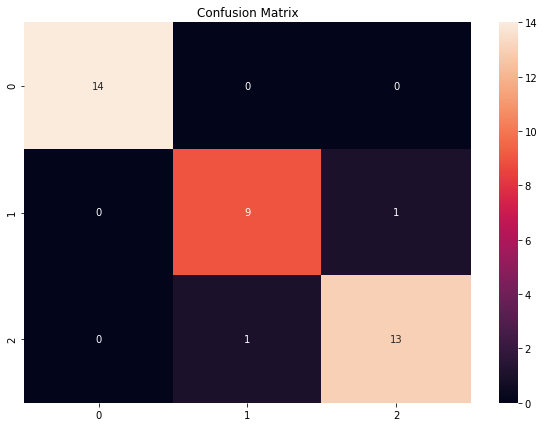

In [11]:
preds = runModel(data[1][0], model)
evalResults(data[1], preds, plot=True, out_size=3)

94% accuracy acheived even on the Iris dataset!